In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
rng = np.random.default_rng(seed = 1)

In [3]:
person = []
for i in range (1,100001):
    person.append ("ID {}".format(i))
#person

In [4]:
df = pd.DataFrame(index=None)
df["Person"] = person

In [5]:
age = []
for i in range(100000):
    a = np.clip(np.random.normal(50, 15), 15, 100)
    age.append(int(a))

In [6]:
df["Age"] = age

In [7]:
gender_choice = ["Male", "Female"]
gender = rng.choice (gender_choice, p = [0.79, 0.21], size = 100000)

In [8]:
df["Gender"] = gender

In [9]:
def applyFunc(s):
    if s == "Male":
        m = rng.normal(179, 10)
        return round(m, 1)
    elif s == "Female":
        f = rng.normal(164, 10)
        return round(f, 1)
    
df["Height"] = df["Gender"].apply(applyFunc)

In [10]:
def applyFunc(s):
    if s == "Male":
        m = np.clip(np.random.normal(89.2, 7 ), 30, 200)
        return round(m, 1)
    elif s == "Female":
        f = np.clip(np.random.normal(73.1, 7 ), 30, 200)
        return round(f, 1)
df["Weight"] = df["Gender"].apply(applyFunc)

In [11]:
df["BMI"] = (df["Weight"] / ((df["Height"])/100)**2).round(1)

In [12]:
def applyFunc(s):
    if s == "Male":
        m = rng.gamma(38.57,0.98)
        return round(m, 1)
    elif s == "Female":
        f = rng.gamma(15.55,0.91)
        return round(f, 1)
df["Alcohol consumption"] = df["Gender"].apply(applyFunc)

In [13]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Overweight"
    elif s >=25:
        return "Obese"
df["BMI Classification"] = df["BMI"].apply(applyFunc)

In [14]:
df

,Person,Age,Gender,Height,Weight,BMI,Alcohol consumption,BMI Classification
0,ID 1,62,Male,166.8,90.4,32.5,32.4,Overweight
1,ID 2,53,Female,170.2,70.2,24.2,16.0,Healthy weight
2,ID 3,41,Male,186.2,98.8,28.5,40.5,Overweight
3,ID 4,52,Female,180.8,76.0,23.2,16.4,Healthy weight
4,ID 5,76,Male,162.3,82.5,31.3,43.1,Overweight
...,...,...,...,...,...,...,...,...
99995,ID 99996,28,Male,150.2,82.2,36.4,41.1,Overweight
99996,ID 99997,69,Male,175.2,96.6,31.5,53.1,Overweight
99997,ID 99998,45,Male,147.2,88.8,41.0,32.9,Obese
99998,ID 99999,38,Male,151.3,87.1,38.0,42.1,Overweight


alcohol consumption g per day

In [15]:
df.describe()

,Age,Height,Weight,BMI,Alcohol consumption
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.580030,175.840289,85.804519,27.974410,32.803156
std,14.846861,11.713063,9.597973,4.006823,11.172768
min,15.000000,125.100000,41.400000,12.800000,4.300000
25%,39.000000,168.200000,80.000000,25.200000,28.400000
50%,49.000000,176.400000,86.900000,27.700000,35.400000
75%,60.000000,183.900000,92.500000,30.400000,40.400000
max,100.000000,220.200000,120.600000,53.200000,70.100000


In [16]:
df["BMI Classification"].value_counts()

Overweight        76494
Healthy weight    22681
Obese               594
Underweight         231
Name: BMI Classification, dtype: int64

In [17]:
df.corr()

,Age,Height,Weight,BMI,Alcohol consumption
Age,1.000000,-0.002809,-0.008567,-0.004804,-0.000995
Height,-0.002809,1.000000,0.353952,-0.655238,0.447184
Weight,-0.008567,0.353952,1.000000,0.463751,0.589981
BMI,-0.004804,-0.655238,0.463751,1.000000,0.056333
Alcohol consumption,-0.000995,0.447184,0.589981,0.056333,1.000000


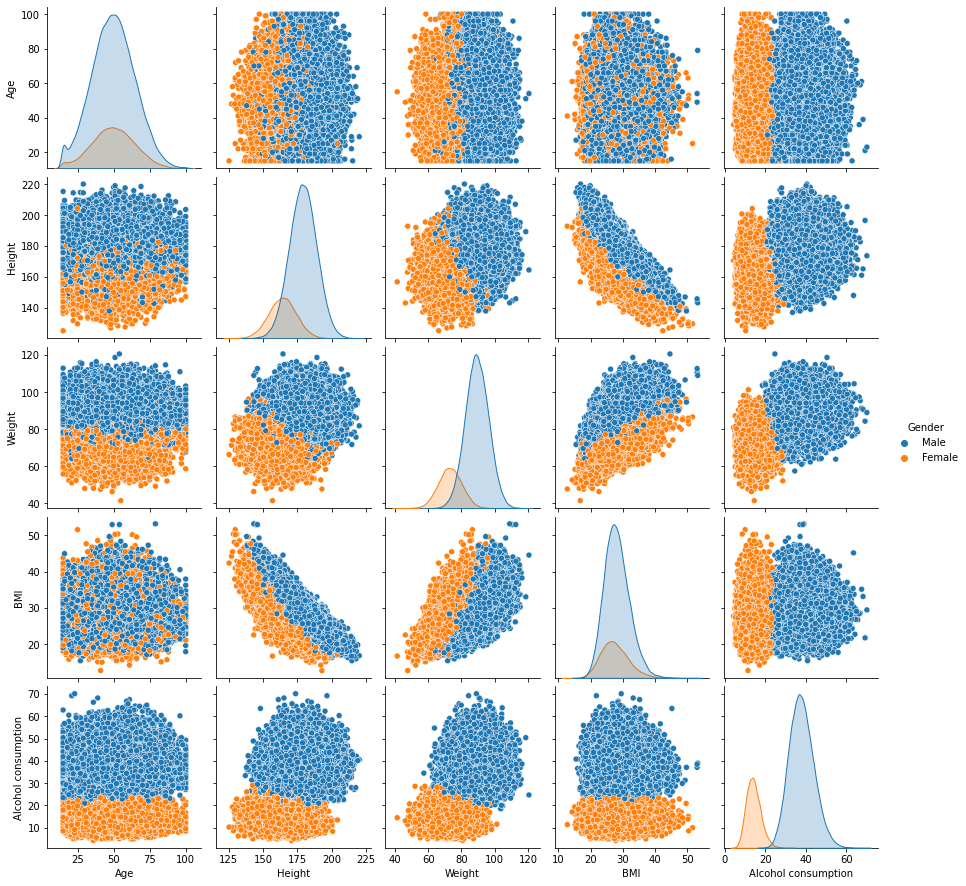

In [18]:
sns.pairplot (data = df, hue = "Gender")